## Density Plots
Variations of denisty plots to look at the distribution of a dataset.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display

### Load Matrix

In [2]:
#matrix = pd.read_csv("datasets/lung_modified.txt", sep='\t') #used for text file
matrix = pd.read_csv("datasets/lung_modified.csv", index_col=0)
display(matrix.head())

,TCGA.05.5420.01A.01R.1628.07,TCGA.55.7283.01A.11R.2039.07,TCGA.55.8208.01A.11R.2241.07,TCGA.75.6205.01A.11R.1755.07,TCGA.44.8117.01A.11R.2241.07,TCGA.MP.A4TA.01A.21R.A24X.07,TCGA.86.8669.01A.11R.2403.07,TCGA.86.8668.01A.11R.2403.07,TCGA.44.A4SS.01A.11R.A24X.07,TCGA.55.7227.01A.11R.2039.07,...,GTEX.11ZTS.1226.SM.5EQMQ,GTEX.12WSL.1026.SM.5CVNJ,GTEX.14A6H.0526.SM.5NQAZ,GTEX.QMRM.0826.SM.3NB33,GTEX.QEG5.1126.SM.33HC2,GTEX.144GO.0226.SM.5LUB1,GTEX.OHPM.0526.SM.2YUMJ,GTEX.13OVG.0326.SM.5KM57,GTEX.WYVS.0526.SM.3NM9W,GTEX.131XH.0426.SM.5DUWU
HIST3H2A,9.809754,2.954724,4.873680,6.735488,4.229448,9.403950,9.239499,5.377771,6.620636,7.551631,...,7.013502,6.579360,2.779043,4.290058,5.065629,8.610875,2.823402,4.035995,6.363210,7.138397
LIN7B,8.894070,5.997310,7.588527,6.751384,7.404094,7.052481,7.639914,6.960350,6.849096,6.815561,...,6.652898,7.326125,7.813368,6.736590,6.400787,6.470978,4.611742,7.042791,6.534886,6.620885
LXN,10.185433,8.375249,10.545116,8.989366,8.228698,8.979396,7.876990,8.551951,9.859755,9.352365,...,8.973689,10.075573,10.725301,8.983359,9.354334,9.349722,8.064545,8.594468,11.275207,8.937756
CNKSR2,0.975818,3.202099,2.356563,2.522910,1.247788,1.214410,3.730376,3.636132,2.301068,3.736715,...,6.138962,3.906332,3.635977,6.441998,5.255572,5.474813,5.667572,6.736665,3.185818,5.077322
SCML1,8.783611,5.817718,7.499751,6.001749,5.588392,5.498967,7.123027,6.673380,7.082229,7.308943,...,8.277807,6.534039,7.056894,6.836865,8.559605,8.933818,6.236766,7.974580,6.333311,8.398369


### Density Plot (KDE) - All Samples
Seaborn density plot can't handle missing data for histograms but the KDE plot sort of can (supresses a warning).

This data has already been log transformed and quantile normalized so the distribution looks very equal.

/home/bselee/.conda/envs/myenv/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/bselee/.conda/envs/myenv/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


plotting 1415 samples


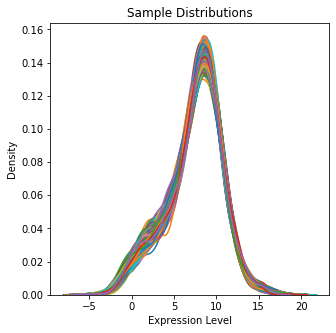

In [3]:
_, ax = plt.subplots(figsize=(5, 5))

i = 0
for column in matrix:
    i = i + 1
    sns.distplot(matrix[column], hist = False, ax=ax)
    
plt.title("Sample Distributions")
plt.xlabel("Expression Level")
plt.ylabel("Density")
#plt.show()
print("plotting %d samples"% (i))

### Density Plot - One Sample

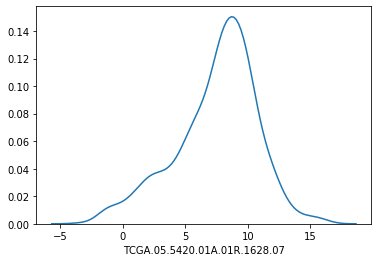

In [4]:
column_name = "TCGA.05.5420.01A.01R.1628.07" # Sample name 
sns.distplot(matrix[column_name], hist = False)

### Density Plot (Histogram) - One sample
Seaborn's hisogram can't handle missing data so this needs to be removed or replaced. The downside is that the dropna() function will drop an entire row even if one cell has a missing value. Alternatively, you could replace the missing data with a value (I left this commented out).

Viewing one sample at a time is ideal because the histogram bars would get in the way of each, and it just takes a lot longer to plot. Setting kde=False removes the line and also shows the actual density count on the y-axis rather than a percentage.  

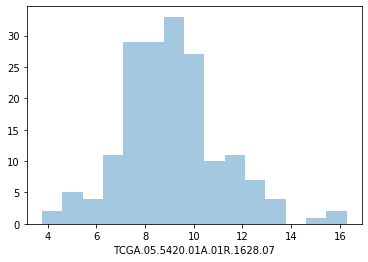

In [5]:
matrix_replacedNaN = matrix.dropna() # Drops all NaN's from entire dataset
#matrix_replacedNaN = matrix.fillna(0) # Replaces NaN's with 0's
column_name = "TCGA.05.5420.01A.01R.1628.07"
sns.distplot(matrix_replacedNaN[column_name], hist = True, kde=False)

You can specify the number of bins with the bin parameter, below shows an example with 10 bins. If not specified then Seaborn with choose the number of bins.

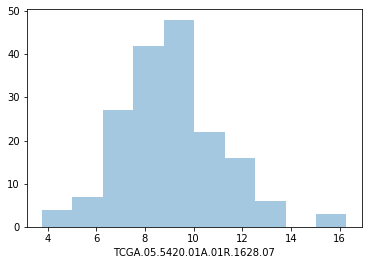

In [6]:
column_name = "TCGA.05.5420.01A.01R.1628.07"
sns.distplot(matrix_replacedNaN[column_name], hist = True, kde=False, bins=10)

In [7]:
for column in matrix:
    sns.distplot(matrix_replacedNaN[column], hist = True, ax=ax)